# Libraries

In [2]:
!pip install -U tensorboard_plugin_profile

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.2 MB 19.3 MB/s eta 0:00:01


In [3]:
pip install git+https://github.com/rabernat/xbatcher.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rabernat/xbatcher.git to /tmp/pip-req-build-mtvhtd4_
  Created wheel for xbatcher: filename=xbatcher-0.1.0-py3-none-any.whl size=6244 sha256=be58aadf09c02d3ec9198e2eb67274b1d2bf1192cb83beb137db515d55c4e1f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8o0on2l/wheels/0f/49/4c/0ecb2095c658d3b579c043c3be2b22c8740af6fab920456d6f
Successfully built xbatcher
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install git+https://github.com/rabernat/xbatcher.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rabernat/xbatcher.git to /tmp/pip-req-build-n1kyb41o
  Created wheel for xbatcher: filename=xbatcher-0.1.0-py3-none-any.whl size=6244 sha256=80bb31fce5c0cc6bec23651535efd78a9d1807fb5e6670c288e3b129478ebec4
  Stored in directory: /tmp/pip-ephem-wheel-cache-08x3qxgq/wheels/0f/49/4c/0ecb2095c658d3b579c043c3be2b22c8740af6fab920456d6f
Successfully built xbatcher
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)
import os
import sys 
import pickle as pk
import  pickle
from datetime import datetime
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
#import nctoolkit as ncµ
import netCDF4 as nc4
import threading
import datetime as dt  # Python standard library datetime  module
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xbatcher as xb

import imageio
os.environ['PROJ_LIB'] = '/opt/python3-anaconda50-5.0.1-7ipsl.el6/share/proj'

import tensorflow as tf
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from skimage.measure import block_reduce


TensorFlow version:  2.2.0


In [2]:
#reload support file 
import sys
import os
py_file_location = "/home/dbennour/DeepPV/AECNN_Model/"
sys.path.append(os.path.abspath(py_file_location))
import read_cloudalbedo_files, cloud_index_functions, write_cloud_index_files, AECNN_model
import CAL_CMV_Generator
from read_cloudalbedo_files import *
from CAL_CMV_Generator import CAL_CMV_DataGenerator
from AECNN_model import *
import importlib
importlib.reload(read_cloudalbedo_files)
importlib.reload(CAL_CMV_Generator)
importlib.reload(AECNN_model)
# type(AECNN_model)
# importlib.reload(write_cloud_index_files)

<module 'AECNN_model' from '/home/dbennour/DeepPV/AECNN_Model/AECNN_model.py'>

In [21]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Train/Test data

In [18]:
#Train data
dirout='/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/'
train_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/')
train_datasets=[]
for file in file_list:
    train_datasets.append(xr.open_dataset(dirout+file))

In [ ]:
#Test data
test_path=r'/homedata/dbennour/DeepPV/CAL_CMV_annual/test_data/CAL_CMV_2020.nc'
test=xr.open_dataset(test_path)
test['CAL'].values


In [ ]:
test=xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601010000_201601010015.nc')

In [ ]:
test.get(['CMV_X','CMV_Y'])

In [7]:
with xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601010000_201601010015.nc') as test:
    inpuut=test[['CAL_T0','CAL_T0-15']]
    output=test[['CMV_X','CMV_Y']]
    test.load()
    

In [12]:
in_arr=inpuut.to_array().values

In [20]:
#Train/Test samples
train_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/')[:50]
test_list=sorted(os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/test_data/'))[:100]
dirout='/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/'
# X_train_datasets=[]
# Y_train_datasets=[]
# X_train=np.empty((len(train_list),513,513,2))
# Y_train=np.empty((len(train_list),513,513,2))
# for i,file in enumerate(train_list):
# #     X_train_datasets.append(xr.open_dataset(dirout+file)[['CAL_T0']].to_array().values)
# #     X_train_datasets.append(xr.open_dataset(dirout+file)[['CAL_T0-15']].to_array().values)
# #     Y_train_datasets.append(xr.open_dataset(dirout+file)[['CMV_X','CMV_Y']].to_array().values)
#     X_train[i,:,:,0]=xr.open_dataset(dirout+file)[['CAL_T0']].to_array().values
#     X_train[i,:,:,1]=xr.open_dataset(dirout+file)[['CAL_T0-15']].to_array().values
#     Y_train[i,:,:,0]=xr.open_dataset(dirout+file)[['CMV_X']].to_array().values
#     Y_train[i,:,:,1]=xr.open_dataset(dirout+file)[['CMV_Y']].to_array().values
    

X_test_datasets=[]
Y_test_datasets=[]
X_test=np.empty((len(test_list),513,513,2))
Y_test=np.empty((len(test_list),513,513,2))
dirout_test='/homedata/dbennour/DeepPV/CAL_CMV_slot/test_data/'
for i,file in enumerate(test_list):
#     X_test_datasets.append(xr.open_dataset(dirout_test+file)[['CAL_T0','CAL_T0-15']].to_array().values)
#     Y_test_datasets.append(xr.open_dataset(dirout_test+file)[['CMV_X','CMV_Y']].to_array().values)
    X_test[i,:,:,0]=xr.open_dataset(dirout_test+file)[['CAL_T0']].to_array().values
    X_test[i,:,:,1]=xr.open_dataset(dirout_test+file)[['CAL_T0-15']].to_array().values
    Y_test[i,:,:,0]=xr.open_dataset(dirout_test+file)[['CMV_X']].to_array().values
    Y_test[i,:,:,1]=xr.open_dataset(dirout_test+file)[['CMV_Y']].to_array().values


In [5]:
# X_train=np.array(X_train_datasets).reshape((-1, 513, 513, 2))
# Y_train=np.array(Y_train_datasets).reshape((-1, 513, 513, 2))
# X_test=np.array(X_test_datasets).reshape((-1, 513, 513, 2))
# Y_test=np.array(Y_test_datasets).reshape((-1, 513, 513, 2))

In [6]:
X_train[0].shape

(513, 513, 2)

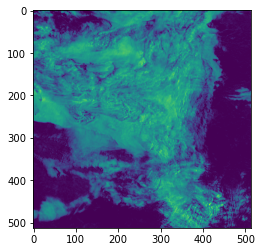

In [9]:
%matplotlib inline
plt.imshow(X_train[49,:,:,1])

In [ ]:
xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601171115_201601171130.nc').to_array().values

## Data Generator

In [40]:
# train_data=train_datasets[1].sel(time=slice("2018-01-01T00:00", "2018-01-02T20:00"))
# test_data=test.sel(time=slice("2020-01-01T00:00", "2020-01T20:00"))

In [46]:
# bgen = BatchGenerator(train_data, {'time': 1}) 

In [22]:
# x_train=train_datasets[1]['CAL']
# y_train=train_datasets[1][['CMV_X','CMV_Y']]
# x_test=test_data['CAL']
# y_test=test_data[['CMV_X','CMV_Y']]

In [3]:
data_path='/homedata/dbennour/DeepPV/CAL_CMV_slot/'
data_generator_train = CAL_CMV_DataGenerator('train_data', data_path,to_fit=True)
data_generator_val=CAL_CMV_DataGenerator('val_data', data_path,to_fit=True)
data_generator_test=CAL_CMV_DataGenerator('test_data', data_path,to_fit=False)

In [4]:
data_generator_train

In [ ]:
# generator = data_generator_train.flow(batch_size=32)

# Model 1: Convolutional auto-encoder


In [31]:
import keras
from keras import layers
from keras.models import Sequential

input_img = keras.Input(shape=(513,513,2))

x = layers.Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (4, 4), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (4, 4), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x= layers.Conv2D(2, (4, 4), activation='sigmoid', padding='same')(x)
decoded = layers.Cropping2D(cropping=((1, 0), (1, 0)), data_format=None)(x) 

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [32]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 513, 513, 2)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 513, 513, 16)      528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 257, 257, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 257, 257, 8)       2056      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 129, 129, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 129, 129, 8)       1032      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 65, 65, 8)         0   

In [ ]:
from keras.callbacks import TensorBoard
# batch_size=32
history=autoencoder.fit(data_generator_train,
                epochs=3,
                shuffle=False,
                validation_data=data_generator_val,         
               
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/5
3288/3288 [==============================] - 1772s 539ms/step - loss: 0.0050 - val_loss: 7.1055e-08
Epoch 2/5
3288/3288 [==============================] - 1576s 479ms/step - loss: 2.1574e-08 - val_loss: 4.3110e-09
Epoch 3/5
3288/3288 [==============================] - 1720s 523ms/step - loss: 1.8796e-09 - val_loss: 6.9009e-10
Epoch 4/5
3288/3288 [==============================] - 1807s 550ms/step - loss: 3.6688e-10 - val_loss: 1.7839e-10
Epoch 5/5
 808/3288 [======>.......................] - ETA: 17:07 - loss: 1.5544e-10

In [15]:
from CAL_CMV_Generator import CAL_CMV_DataGenerator

In [18]:
#load model 
autoencoder=loadModel("/home/dbennour/DeepPV/AECNN_Model/AECNN_v1.2")

Yaml Model  /home/dbennour/DeepPV/AECNN_Model/AECNN_v1.2 .yaml loaded 
Weights  /home/dbennour/DeepPV/AECNN_Model/AECNN_v1.2 .h5 loaded 


In [21]:
decoded_imgs= autoencoder.predict(X_test)

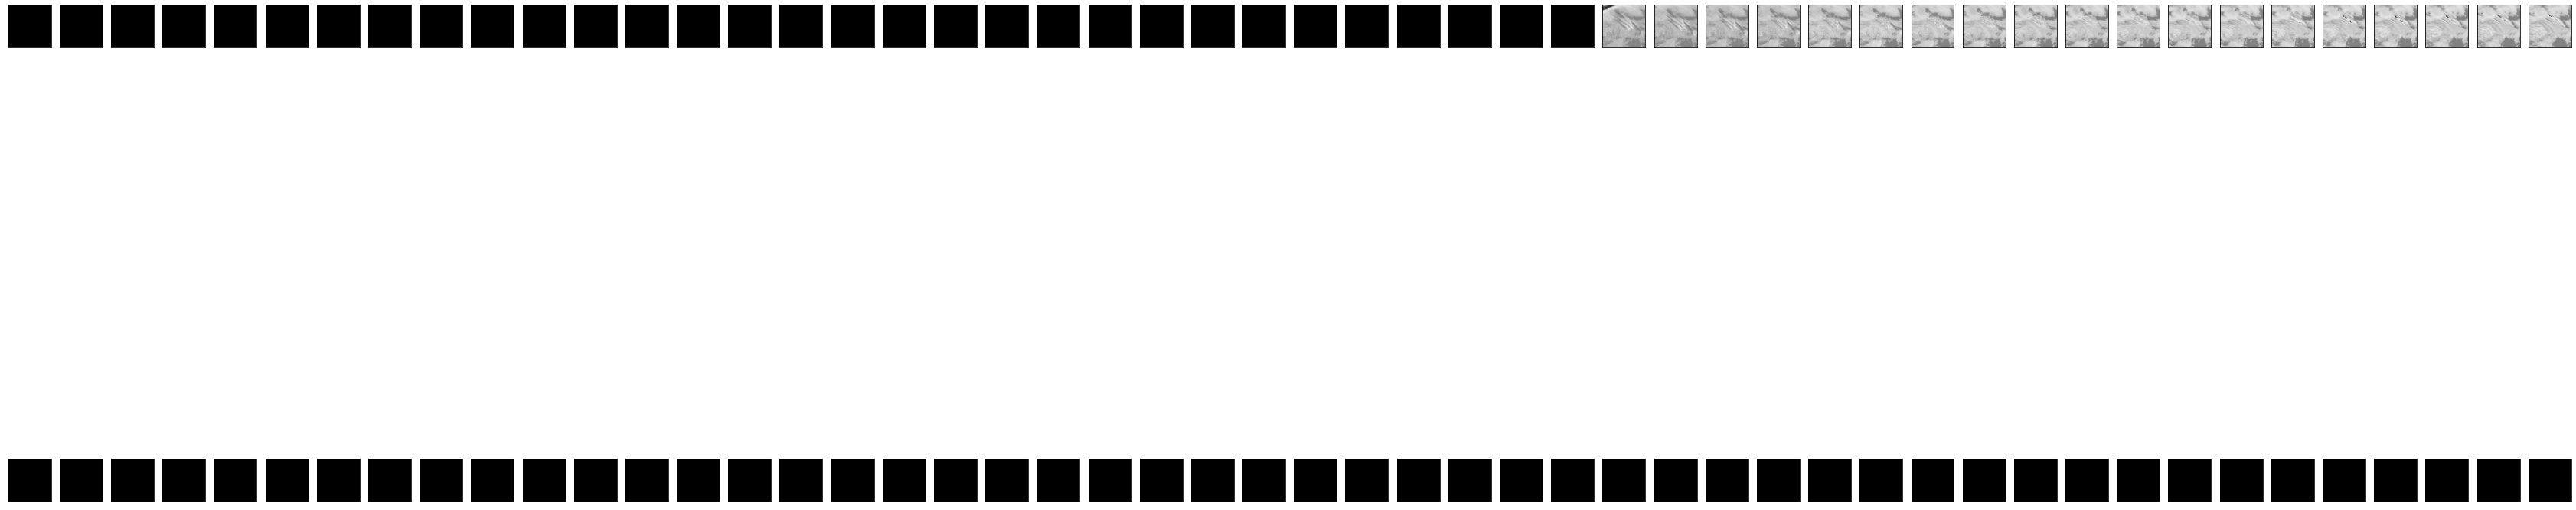

In [22]:
# decoded_imgs = autoencoder.predict(data_generatorb_test)
%matplotlib inline
n =50
plt.figure(figsize=(60, 20))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    im1=plt.imshow(X_test[i,:,:,0],cmap='gray')
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     plt.title('True')
#     plt.colorbar(im1)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    im2=plt.imshow(decoded_imgs[i,:,:,0],cmap='gray')
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     plt.title('predicted')
#     plt.colorbar(im2)
plt.show()


In [ ]:
X_test[49,:,:,0]

In [26]:
decoded_imgs.shape

(100, 513, 513, 2)

In [28]:
np.unique(decoded_imgs[49,:,:,0])

array([0.], dtype=float32)

In [36]:
autoencoder=AECNN_build()

In [37]:
 AECNN_fit(autoencoder,data_generator_train,data_generator_val,3)

NameError: name 'autoencoder' is not defined

# Model 2: LSTM 